This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [112]:
## import needed libraries

import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import nltk
import bs4

In [113]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
print(user_data.info())
print(user_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     127 non-null    int64  
 1   game                   127 non-null    object 
 2   season                 127 non-null    int64  
 3   play_length            123 non-null    float64
 4   box_length             127 non-null    int64  
 5   time_delta             124 non-null    float64
 6   complexity             125 non-null    float64
 7   rating                 124 non-null    float64
 8   rank                   124 non-null    float64
 9   live                   127 non-null    object 
 10  start_player           85 non-null     object 
 11  winner                 108 non-null    object 
 12  bp_score               88 non-null     float64
 13  bp_score_normal        89 non-null     float64
 14  bp_score_adjusted      89 non-null     float64
 15  bp_pic

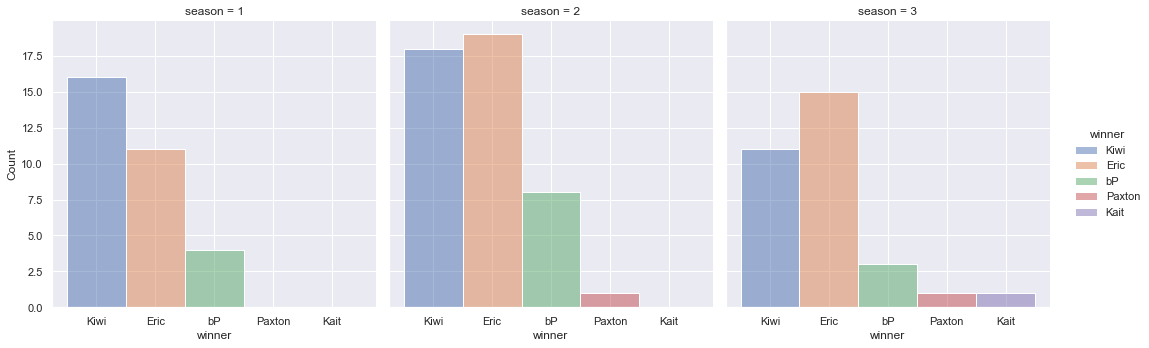

In [114]:
user_data["season"] = user_data["season"].astype(str)
sns.displot(data=user_data, x="winner", col="season", hue="winner")
sns.set(rc = {'figure.figsize': (15,8)})
plt.show()
plt.close()

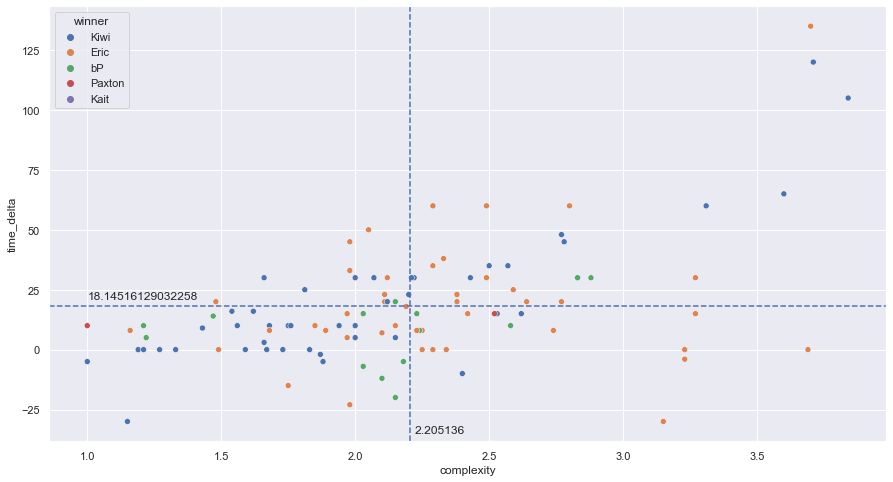

In [115]:

sns.scatterplot(data=user_data, x="complexity", y="time_delta", hue="winner")
plt.axhline(user_data["time_delta"].mean(), ls="--")
plt.text(1,21, f"{user_data['time_delta'].mean()}")
plt.axvline(user_data["complexity"].mean(), ls="--")
plt.text(2.22, -35, f"{user_data['complexity'].mean()}")
plt.show()
plt.close()


Text(2.22, -35, '2.17')

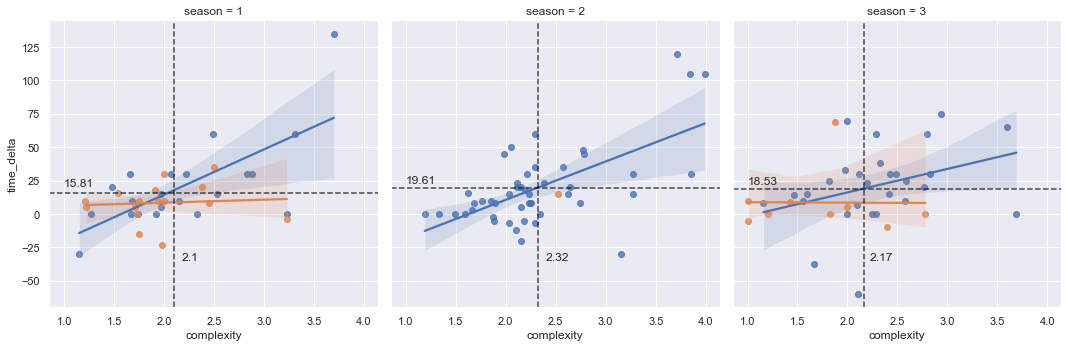

In [120]:
g = sns.FacetGrid(user_data, col="season", hue="live", height=5)
g.map(sns.regplot, "complexity", "time_delta")
time1, time2, time3 = user_data.groupby('season')['time_delta'].mean()
comp1, comp2, comp3 = user_data.groupby('season')['complexity'].mean()
ax1, ax2, ax3 = g.axes[0]
ax1.axhline(time1, ls="--", color="black", alpha=.7)
ax1.axvline(comp1, ls="--", color="black", alpha=.7)
ax1.text(1,21,f"{round(time1, 2)}")
ax1.text(2.18,-35,f"{round(comp1, 2)}")
ax2.axhline(time2, ls="--", color="black", alpha=.7)
ax2.axvline(comp2, ls="--", color="black", alpha=.7)
ax2.text(1,23,f"{round(time2, 2)}")
ax2.text(2.4,-35,f"{round(comp2, 2)}")
ax3.axhline(time3, ls="--", color="black", alpha=.7)
ax3.axvline(comp3, ls="--", color="black", alpha=.7)
ax3.text(1,22,f"{round(time3, 2)}")
ax3.text(2.22,-35,f"{round(comp3, 2)}")